<a href="https://colab.research.google.com/github/trjgdyan/PCVK_Genap_2021/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Tri Jagad Ariyani
# NIM : 2141720049
# Kelas : 3CTI
# Week 6 :  Histogram, Histogram Equalization, Dithering

1. Import folder yang ada di Drive

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import beberapa library yang akan digunakan untuk uji coba praktikum minggu ke-6

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

3. Buatlah Histogram citra seperti output histogram berikut berdasarkan flowchart dibawah ini (Gunakan lena.jpg)

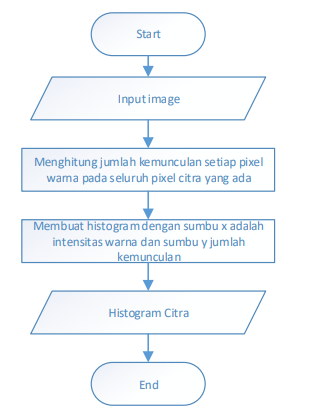

<BarContainer object of 256 artists>

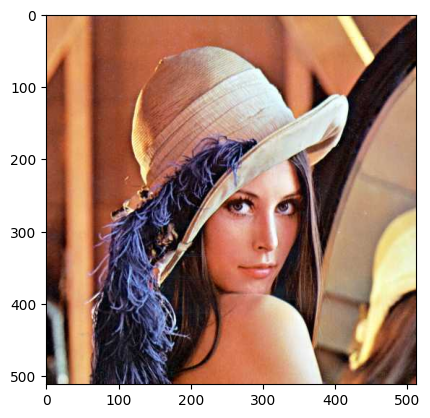

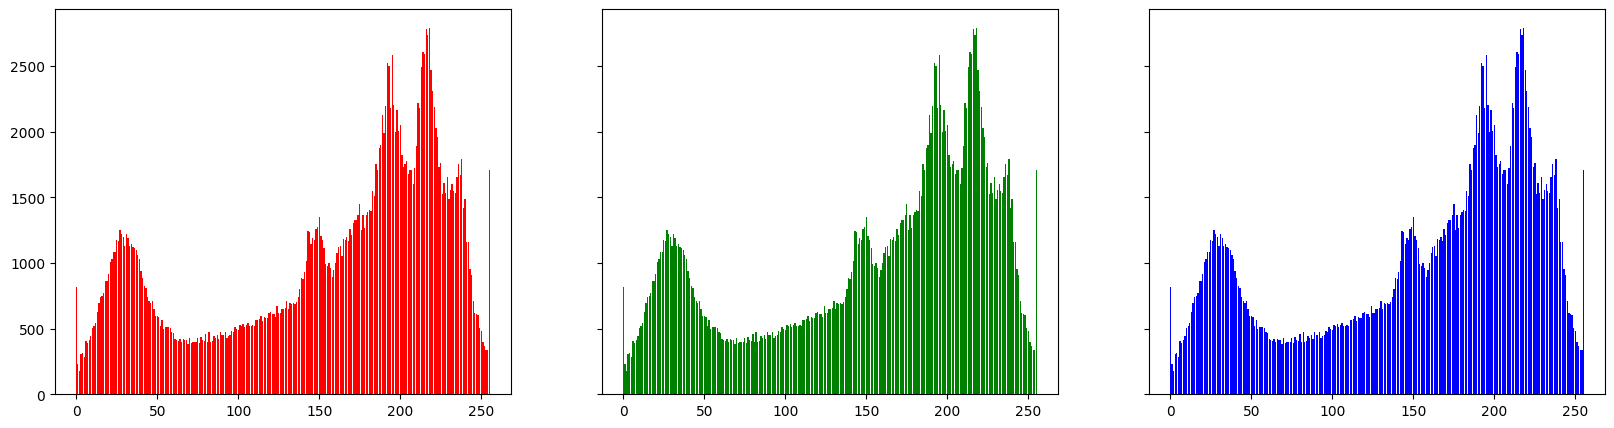

In [ ]:
# Kode Program Nomor 3
img_1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
img_rgb = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
plt.imshow(img_rgb)

height, width, depth = np.shape(img_1) #mengambil dimensi citra
names = np.arange(256)

#membuaat array kosong untuk menghitung jumlah piksel berdasarkan intensitas warna bgr
blue = [0]*256
green = [0]*256
red = [0]*256

#mengiterasi setiap baris(tinggi) & kolom(lebar) citra
for y in range(0,height):
  for x in range(0,width):
    blue[img_1[y][x][0]] += 1  #untuk menghitung distribusi warna dan memperbarui array bgr
    green[img_1[y][x][1]] += 1
    red[img_1[y][x][2]] += 1

fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
axs[0].bar(names, red, color='red')
axs[1].bar(names, red, color='green')
axs[2].bar(names, red, color='blue')

4. Setelah mengerjakan soal no.3, buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh NumPy yaitu "histogram". Bandingkan hasilnya. Apakah output muncul sama?

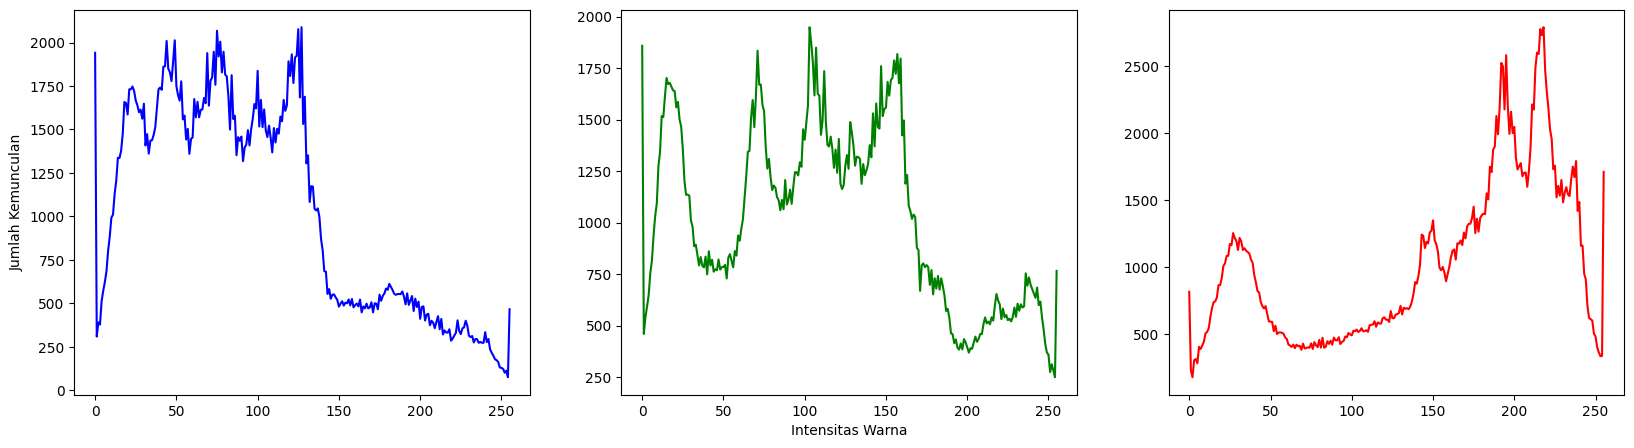

In [ ]:
# Kode Program Nomor 4

#membuat tiga subplot terpisah untuk B, G, dan R
fig, axs = plt.subplots(1, 3, figsize=[20,5])

#menghitung dan menampilkan histogram warna biru (B)
hist_blue, bin_edges_blue = np.histogram(
    img_1[:, :, 0], bins=256, range=(0, 256)
)
axs[0].plot(bin_edges_blue[0:-1], hist_blue, color='blue')
axs[0].set_xlabel
axs[0].set_ylabel("Jumlah Kemunculan")
axs[0].set_title

#menghitung dan menampilkan histogram warna hijau (G)
hist_green, bin_edges_green = np.histogram(
    img_1[:, :, 1], bins=256, range=(0, 256)
)
axs[1].plot(bin_edges_green[0:-1], hist_green, color='green')
axs[1].set_xlabel("Intensitas Warna")
axs[1].set_ylabel
axs[1].set_title

#menghitung dan menampilkan histogram warna merah (R)
hist_red, bin_edges_red = np.histogram(
    img_1[:, :, 2], bins=256, range=(0, 256)
)
axs[2].plot(bin_edges_red[0:-1], hist_red, color='red')
axs[2].set_xlabel
axs[2].set_ylabel
axs[2].set_title

plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)


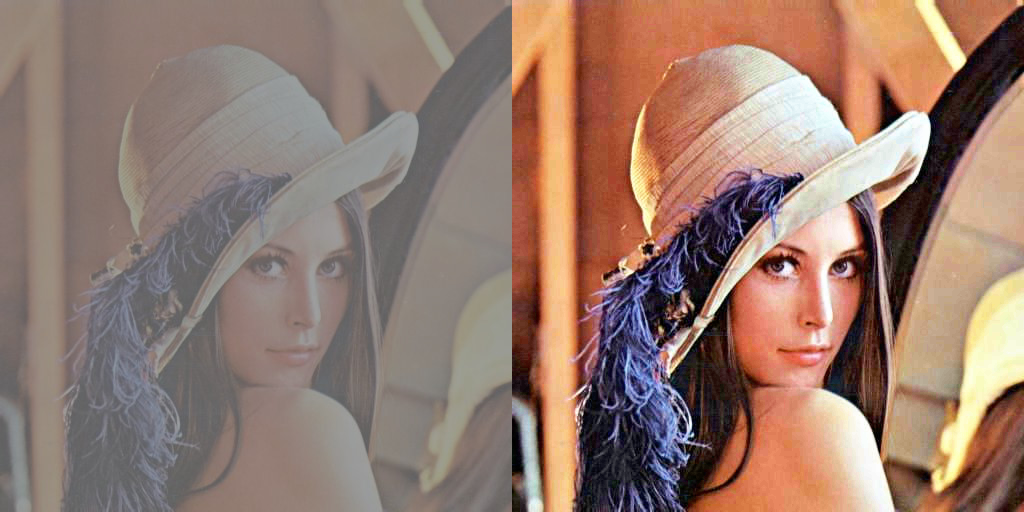

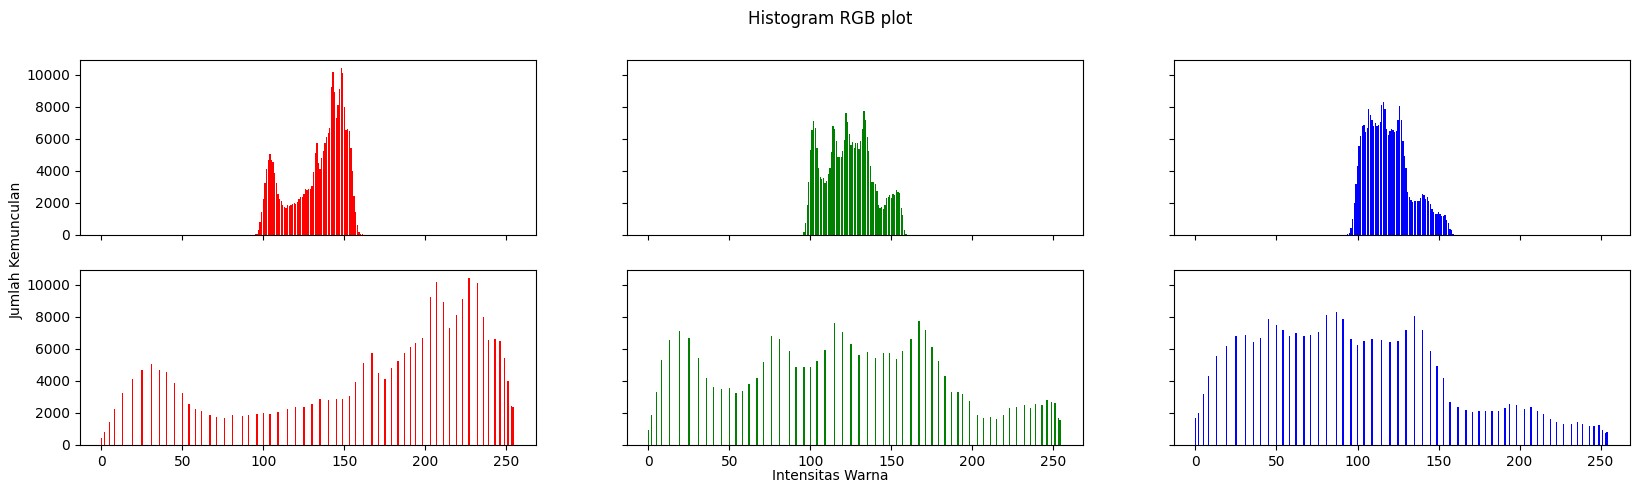

In [ ]:
# Kode Program Nomor 5
img1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')
def histog(img1):
  height, width, depth = np.shape(img1)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1
  return ax

histo_asli = histog(img1)

#convert ke Numpy array
img_array = np.asarray(img1)

#Langkah 1 : Normalisasi histogram kumulatif
#ratakan susunan gambar dan hitung histogram dengan binning
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalisasi
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels

#normalisasi histogram kumulatif
chistogram_array = np.cumsum(histogram_array)

#Langkah 2 : Tabel pencarian pemetaan pixel
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Langkah 3 : Transformasi
#ratakan array gambar menjadi 10 list
img_list = list(img_array.flatten())

#mengubah nilai pixel untuk menyamakan
eq_img_list = [transform_map[p] for p in img_list]

#reshape dan tulis ulang kedalam img_array
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2))
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig. suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

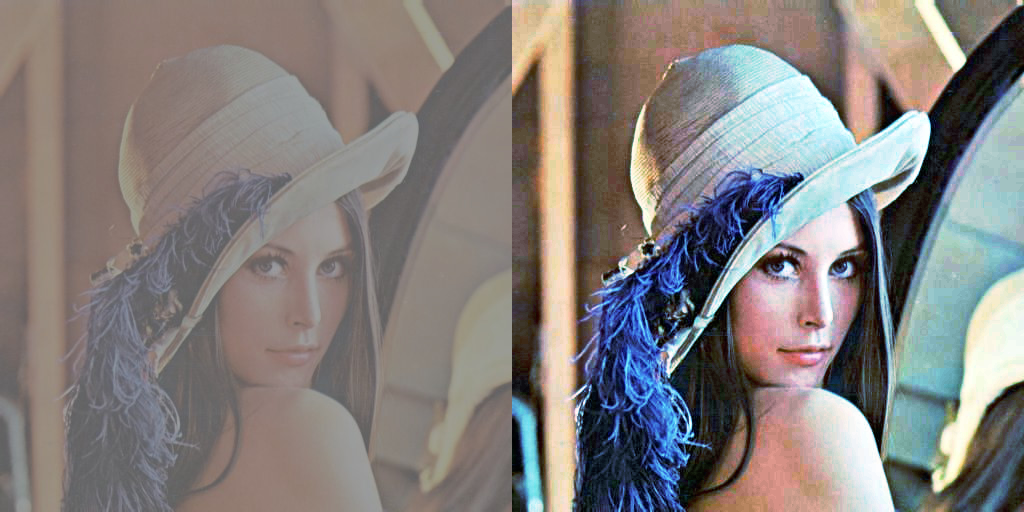

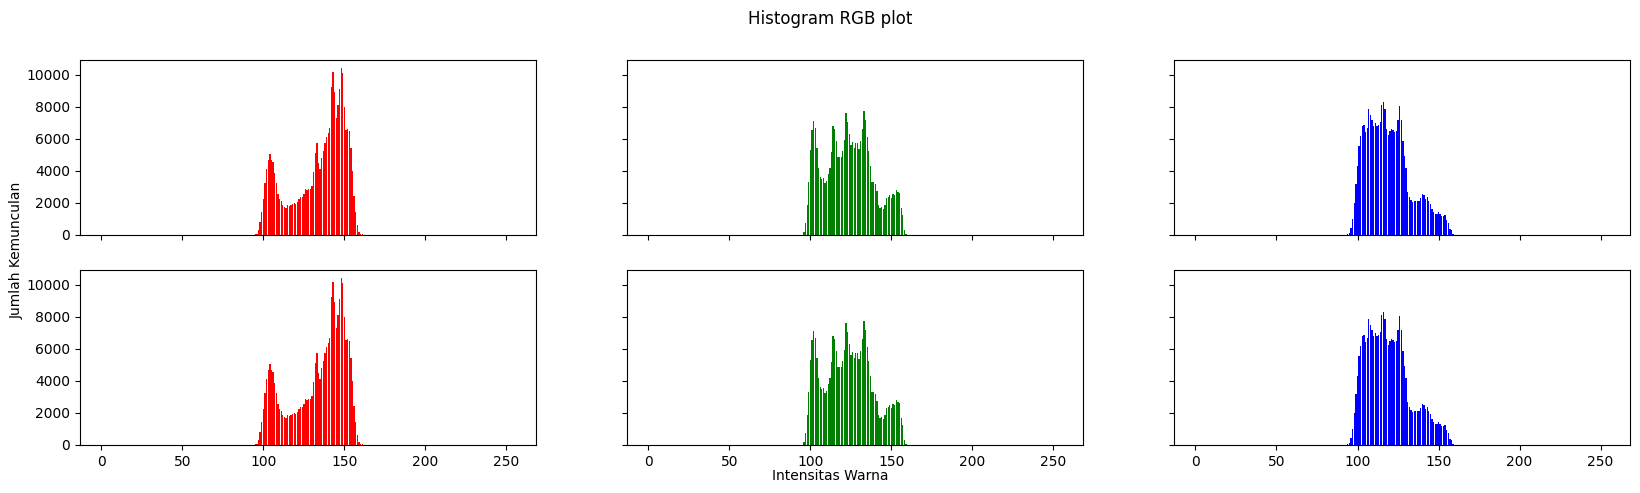

In [ ]:
# Kode Program Nomor 6
channels = cv.split(img1)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img1, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')


7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

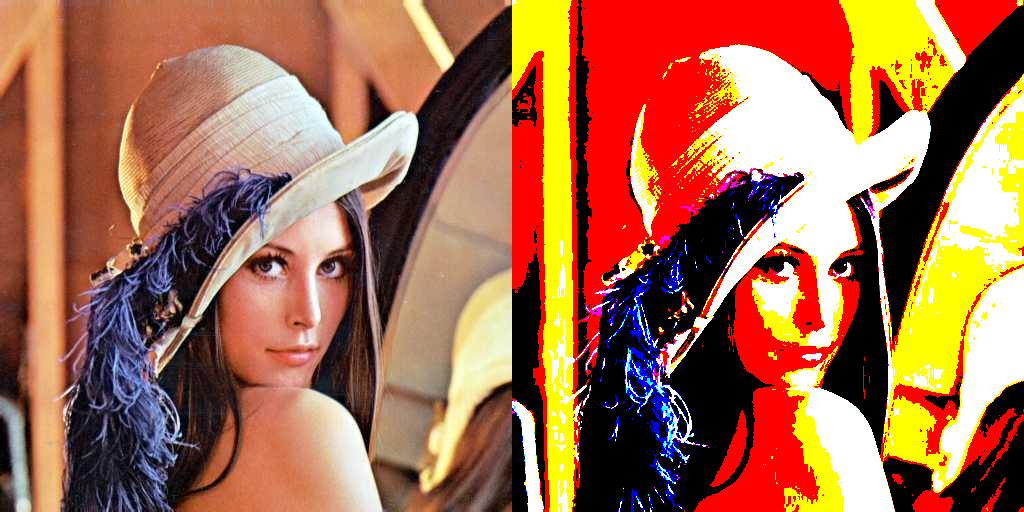

In [ ]:
# Kode Program Nomor 7
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

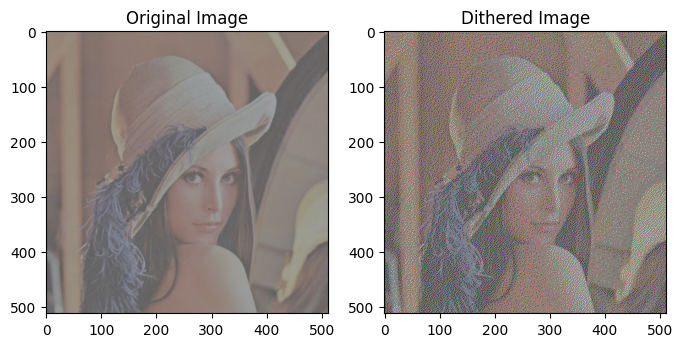

In [21]:
# Kode Program Nomor 8

img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg')

# Tampilkan gambar aslinya
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original Image')

# Lakukan dithering Floyd-Steinberg pada setiap saluran warna secara terpisah
def floyd_steinberg_dithering_channel(image_channel):
    height, width = image_channel.shape
    new_channel = np.copy(image_channel)
    for y in range(height):
        for x in range(width):
            old_pixel = new_channel[y, x]
            new_pixel = 255 if old_pixel > 128 else 0
            error = old_pixel - new_pixel
            new_channel[y, x] = new_pixel
            if x < width - 1:
                new_channel[y, x + 1] += error * 7 / 16
            if x > 0 and y < height - 1:
                new_channel[y + 1, x - 1] += error * 3 / 16
            if y < height - 1:
                new_channel[y + 1, x] += error * 5 / 16
            if x < width - 1 and y < height - 1:
                new_channel[y + 1, x + 1] += error * 1 / 16
    return new_channel

# Bagi gambar menjadi saluran warna
b, g, r = cv.split(img)

# Terapkan dithering ke setiap saluran warna
dithered_b = floyd_steinberg_dithering_channel(b)
dithered_g = floyd_steinberg_dithering_channel(g)
dithered_r = floyd_steinberg_dithering_channel(r)

# Gabungkan kembali saluran warna yang ragu-ragu menjadi satu gambar
dithered_img = cv.merge((dithered_b, dithered_g, dithered_r))

# Tampilkan gambar yang ragu-ragu
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(dithered_img, cv.COLOR_BGR2RGB))
plt.title('Dithered Image')

plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

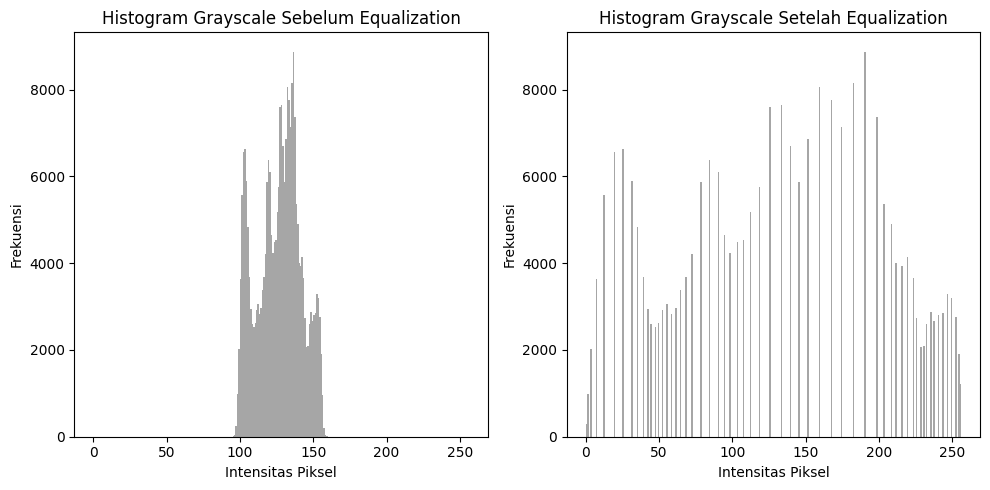

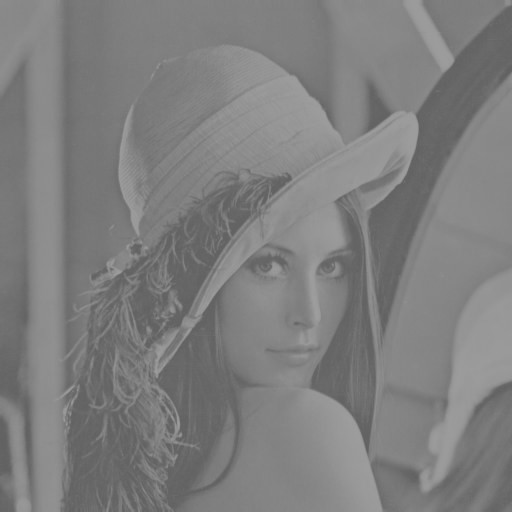

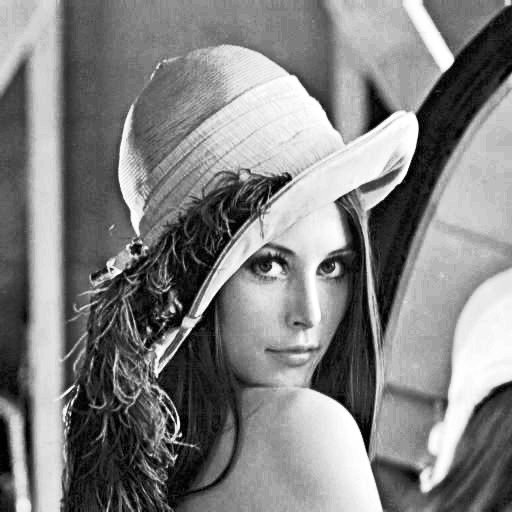

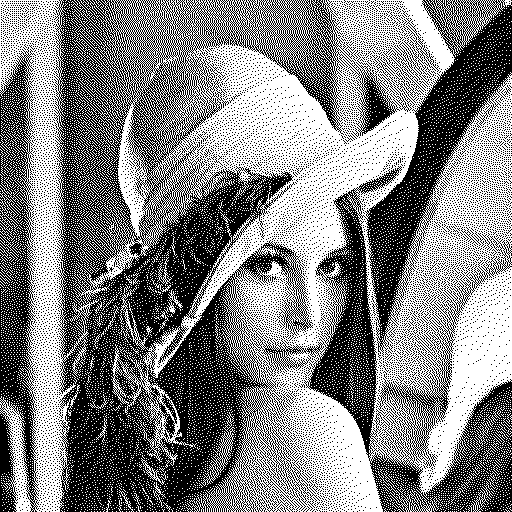

In [29]:
# Kode Program Nomor 9

# Baca gambar dan ubah ke citra grayscale
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Plot histogram dari citra grayscale
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Sebelum Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

# Menerapkan histogram equalization
equalized_img = cv.equalizeHist(img)

# Plot histogram dari citra setelah equalization
plt.subplot(122)
plt.hist(equalized_img.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.title('Histogram Grayscale Setelah Equalization')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# Menerapkan proses dithering Floyd and Steinberg
img_float = np.float32(equalized_img)
height, width = img.shape

for y in range(height):
    for x in range(width):
        old_value = img_float[y, x]
        new_value = round(old_value / 255) * 255
        img_float[y, x] = new_value

        error = old_value - new_value

        if x < width - 1:
            img_float[y, x + 1] += error * 7 / 16
        if y < height - 1:
            if x > 0:
                img_float[y + 1, x - 1] += error * 3 / 16
            img_float[y + 1, x] += error * 5 / 16
            if x < width - 1:
                img_float[y + 1, x + 1] += error * 1 / 16

output_img = np.uint8(img_float)

# Menampilkan gambar hasil
cv2_imshow(img)
cv2_imshow(equalized_img)
cv2_imshow(output_img)

# Kesimpulan

Dalam tugas praktikum dapat mempelajari konsep dasar dalam pemrosesan citra, diantaranya histogram citra, histogram equalization, dan error diffusion. Histogram citra merupakan alat analisis penting yang memungkinkan evaluasi distribusi intensitas warna piksel dalam citra digital. Histogram equalization digunakan untuk meningkatkan kontras dan detail citra dengan meratakan distribusi intensitas warna. Selain itu, teknik error diffusion adalah metode halftoning yang berguna untuk mengurangi kedalaman citra tanpa mengorbankan kualitas gambar. Dalam praktikum ini, teknik-teknik tersebut diterapkan pada citra Lena dan membandingkan hasilnya dengan implementasi menggunakan library NumPy dan OpenCV.

